In [ ]:
!pip install numpy pandas matplotlib seaborn scikit-learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


Data Generation

In [ ]:
# Set a random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 1000

# Generate features
square_footage = np.random.normal(1000, 200, n_samples)  # e.g., mean = 1000 sqft, std = 200 sqft

# Generate a more realistic synthetic target variable (price)
price = (500 +
         10 * square_footage +
         np.random.normal(0, 500, n_samples))  # Adding noise

# Create a DataFrame
data = pd.DataFrame({
    'Square_Footage': square_footage,
    'Price': price
})

# Display the first few rows of the DataFrame
data.head()


,Square_Footage,Price
0,1099.342831,12193.106024
1,972.347140,10685.788239
2,1129.537708,11825.192261
3,1304.605971,13222.591324
4,953.169325,10380.804907


Visualize the Data

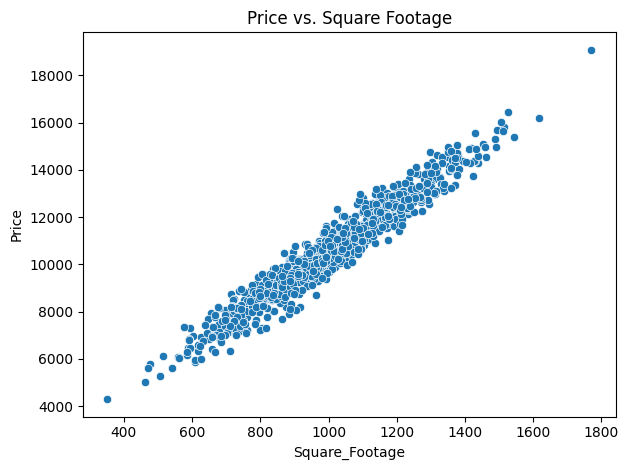

In [ ]:
sns.scatterplot(data=data, x='Square_Footage', y='Price')
plt.title('Price vs. Square Footage')

plt.tight_layout()
plt.show()


 Prepare Data for Modeling

In [ ]:
# Define features and target
x = np.array(data[['Square_Footage']])
y = np.array(data['Price'])

#adding a column of ones to X
X = np.c_[np.ones(len(x)), np.array(x)]
y = np.resize(np.array(y), (len(y),1))

print("Shape of X :" , X.shape)
print("Shape of y : ", y.shape)

Shape of X : (1000, 2)
Shape of y :  (1000, 1)


Hypothesis for regression

In [ ]:
def h(X, theta):
    hypothesis = np.matmul(X, theta)
    return hypothesis

Cost compute

In [ ]:
def computeCost(X, y, theta):
    error = h(X, theta) - y
    cost = (1/(2*len(X))) * (np.sum(np.square(error)))
    return cost

Gradient descent

In [ ]:
def gradientDescent(X, y, theta, alpha, iterations):
    J = []
    for i in range(iterations):
        dJ = (1/len(X)) * np.matmul(np.transpose(X), h(X, theta) - y)
        theta = theta - alpha * dJ
        J.append(computeCost(X, y, theta))
    return theta, J

In [ ]:
theta_GD = np.random.rand(2,1)
alpha = 0.000000001

print(f"Initialised theta : {theta_GD}")

Initialised theta : [[0.40710649]
 [0.06600984]]


In [ ]:
theta_GD, cost_GD = gradientDescent(X, y, theta_GD, alpha, iterations=10000)

print(f"Theta Gradient Descent : {theta_GD}")

Theta Gradient Descent : [[ 0.41736235]
 [10.50935328]]


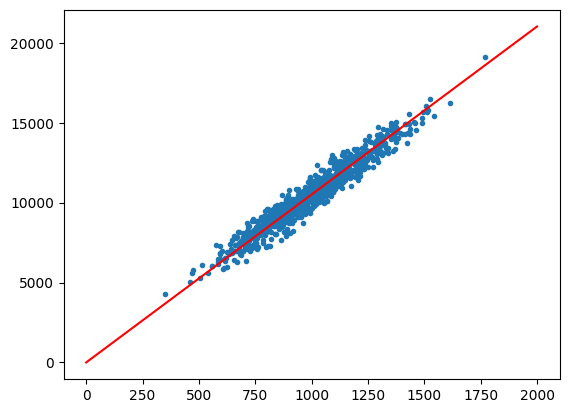

In [ ]:
plt.plot(x, y, '.')

lx = np.linspace(0,2000,100)
ly = theta_GD[1]*lx + theta_GD[0]
plt.plot(lx,ly, '-r')

plt.show()

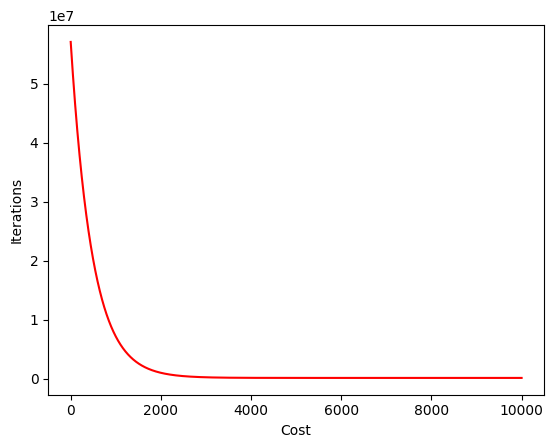

In [ ]:
plt.xlabel("Cost")
plt.ylabel("Iterations")
lx = np.linspace(1,len(cost_GD),len(cost_GD))
plt.plot(lx, cost_GD, '-r')
plt.show()

Cost function with regularization

In [ ]:
def costReg(X, y, theta, lmbda):
    error = h(X, theta) - y
    cost = (1/(2*len(X))) * (np.sum(np.square(error))) + lmbda * np.sum(np.square(theta))
    return cost

Stochastic Gradient Descent

In [ ]:
def SGD_reg(X, y, theta, alpha, lmbda, iterations):
    J = []
    for i in range(iterations):
        for j in range(len(X)):
            X_j = np.resize(X[j], (1, len(X[j])))
            dJ = (1/len(X)) * np.matmul(np.transpose(X_j), h(X_j, theta) - y[j])
            theta[0] = theta[0] - alpha * dJ[0]
            theta[1:] = theta[1:] * (1 - alpha*(lmbda/len(X))) - alpha * dJ[1:]
            J.append(costReg(X, y, theta, lmbda))
    return theta, J

In [ ]:
theta_reg = np.random.rand(2, 1)
alpha = 0.00001
lmbda = 0.001

print(f" Initilised theta : {theta_reg}")

 Initilised theta : [[0.80823521]
 [0.94768803]]


In [ ]:
theta_reg, cost_reg = SGD_reg(X, y, theta_reg, alpha, lmbda, iterations=10)
print(f"Theta with regularization : {theta_reg}")

Theta with regularization : [[ 0.81986207]
 [10.51386133]]


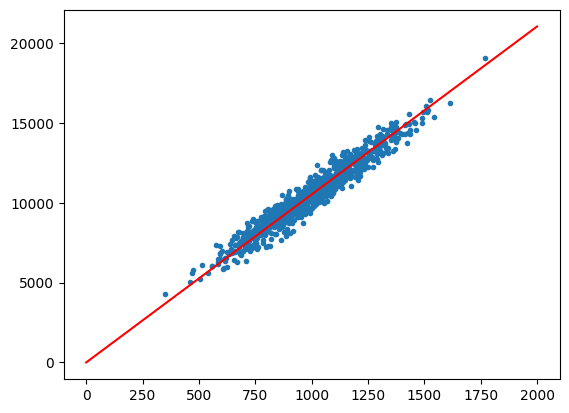

In [ ]:
plt.plot(x, y, '.')

lx = np.linspace(0,2000,100)
ly = theta_reg[1]*lx + theta_reg[0]
plt.plot(lx,ly, '-r')

plt.show()

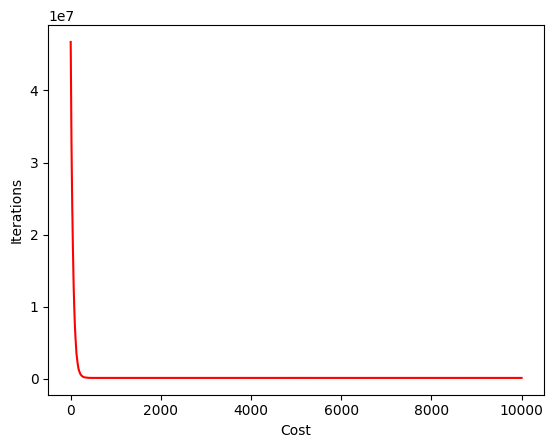

In [ ]:
plt.xlabel("Cost")
plt.ylabel("Iterations")
lx = np.linspace(1,len(cost_reg),len(cost_reg))
plt.plot(lx, cost_reg, '-r')
plt.show()